## Objective: Utilize historical stock data to optimize investment portfolio

#### Introduction:
Welcome to the Portfolio Optimization Notebook! In this notebook, we'll explore the process of optimizing an investment portfolio using mean-variance optimization.

The goal of this project is to demonstrate how to construct an optimized investment portfolio that maximizes return for a given level of risk. We'll achieve this by utilizing historical stock data to calculate expected returns, volatility, and correlations between assets. Then, we'll use mean-variance optimization to find the optimal allocation of assets in the portfolio.

#### Concepts Utilized:

1. *Data Collection and Preprocessing*:
   - We'll collect historical stock prices for a set of assets and preprocess the data to handle missing values and adjust for stock splits and dividends.

2. *Mean-Variance Optimization*:
   - Mean-variance optimization is a quantitative method used to find the optimal allocation of assets in a portfolio that maximizes return for a given level of risk. We'll define an objective function to minimize, representing the negative Sharpe ratio, and use optimization techniques to find the optimal weights for each asset.

3. *Efficient Frontier Visualization*:
   - The efficient frontier is a graphical representation of optimal portfolios that offer the highest expected return for a given level of risk. We'll visualize the efficient frontier to identify the optimal portfolio allocation.

#### Need of the Project:

Optimizing investment portfolios is crucial for investors to achieve their financial goals while managing risk effectively. By constructing an optimized portfolio, investors can:
- Maximize returns: Allocate resources efficiently to generate the highest possible returns.
- Manage risk: Diversify investments to minimize the impact of market fluctuations.
- Achieve financial objectives: Tailor the portfolio to meet specific investment goals, such as retirement planning or wealth accumulation.

#### Future Scope of the Project:

This project serves as a foundation for further exploration and development in the field of portfolio management. Some future enhancements and applications include:
- Incorporating additional factors: Integrate factors such as market sentiment, economic indicators, and sector analysis for more robust portfolio optimization.
- Real-time portfolio management: Develop algorithms for real-time portfolio rebalancing and risk management based on live market data.
- Machine learning applications: Implement machine learning models for predicting asset returns, volatility, and correlations to enhance portfolio optimization strategies.

By continuously refining and expanding upon this project, we can provide investors with more sophisticated and effective tools for managing their investment portfolios.

Portfolio optimization is a fundamental concept in finance, allowing investors to make informed decisions about asset allocation to achieve their financial objectives. In this notebook, we'll explore the theory and implementation of portfolio optimization, providing insights into the process and its importance in investment management.

Let's dive into the notebook and explore the world of portfolio optimization together!
    

#### Table of Contents:
1. Data Collection
2. Data Preprocessing
3. Mean-Variance Optimization
4. Efficient Frontier Visualization

#### Data Collection
Data collection involves gathering historical stock prices for the assets in our portfolio. These prices will be used to calculate returns, volatility, and correlations.

- *Historical Stock Prices*: Prices of assets (e.g., stocks, ETFs) over a period of time.
- *API (Application Programming Interface)*: A set of rules and protocols for building and interacting with software applications.
- *Yahoo Finance API*: An API that provides access to financial data, including historical stock prices.

Data Sourse: Yahoo Finance API

In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/315.9 kB ? eta -:--:--
     --- ----------------------------------- 30.7/315.9 kB 1.3 MB/s eta 0:00:01
     --------- --------------------------- 81.9/315.9 kB 907.3 kB/s eta 0:00:01
     ---------- -------------------------- 92.2/315.9 kB 871.5 kB/s eta 0:00:01
     ---------------- ------------------- 143.4/315.9 kB 774.0 kB/s eta 0:00:01
     ------------------- ---------------- 174.1/315.9 kB 803.1 kB/s eta 0:00:01
     ------------------------- ---------- 225.3/315.9 kB 808.4 kB/s eta 0:00:01
     ----------------------------- ------ 256.0/315.9 kB 827.5 kB/s eta 0:00:01
     -----------------------------------  307.2/315.9 kB 824.9 kB/s eta 0:00:01
     -----------------------------------  307.2/315.9 kB 824.9 kB/s eta 0:00:01
     ------------------------------------ 315.9/315.9 kB 673.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Instal

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import yfinance as yf

In [2]:
portfolio_assets = ['AAPL','MSFT','GOOG','AMZN']
start_date = '2022-01-01'
end_date = '2024-01-01'

In [3]:
# fetching historical data for portfolio assets

portfolio_data = yf.download(portfolio_assets, start=start_date,end=end_date)['Adj Close']


[*********************100%%**********************]  4 of 4 completed


In [4]:
portfolio_data.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-01-03,179.481110,170.404495,145.074493,328.120880
2022-01-04,177.203217,167.522003,144.416504,322.494598
2022-01-05,172.489609,164.356995,137.653503,310.114655
2022-01-06,169.610199,163.253998,137.550995,307.664246
2022-01-07,169.777847,162.554001,137.004501,307.821045


#### Data Cleaning 
Data preprocessing involves cleaning the data and preparing it for analysis. This includes handling missing values and adjusting for stock splits and dividends.

- *Missing Values*: Absent or incomplete data points in the dataset.
- *Adjusted Closing Prices*: Prices that account for stock splits and dividends.


Let's proceed to clean data by handling any missing values and adjusting for stock splits and dividends

In [5]:
import pandas as pd 

In [6]:
# Checking for missing values 
missing_values = portfolio_data.isnull().sum()
print("Missing Values: \n",missing_values)

Missing Values: 
 Ticker
AAPL    0
AMZN    0
GOOG    0
MSFT    0
dtype: int64


In [7]:
# For adjusting for stock splits and dividends, no specific code needed for this step as Yahoo Finance data is already adusted

In [8]:
# Info about data
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    501 non-null    float64
 1   AMZN    501 non-null    float64
 2   GOOG    501 non-null    float64
 3   MSFT    501 non-null    float64
dtypes: float64(4)
memory usage: 19.6 KB


In [9]:
portfolio_data.describe()

Ticker,AAPL,AMZN,GOOG,MSFT
count,501.000000,501.000000,501.000000,501.000000
mean,162.376175,123.740526,117.398380,288.381420
std,17.864157,21.661290,16.330025,41.541130
min,123.998451,81.820000,83.489998,211.379272
25%,147.918747,104.300003,103.629997,252.430771
50%,163.289963,125.779999,118.139999,282.811646
75%,175.386337,139.985992,132.169998,323.317474
max,197.589523,170.404495,148.036499,381.993622


Now, we calculate the retuens, volatility and correlations between assets to prepare for portfolio optimazation

#### Data Preprocessing

In [10]:
# Calculate daily returns
daily_return = portfolio_data.pct_change()

# Calculate annualized returns (mean of daily returns * 252 trading days)
annualized_return = daily_return.mean() * 252 

# Calculate annualized volatily ( SD of Daily_return * sqrt(252))
annualized_volatility = daily_return.std() * (252 * 0.5) 

# Calculate correlaion matrix
correlation_matrix = daily_return.corr()

print("Annualized Returns:\n", annualized_return)
print("\nAnnuliazed Volatility:\n",annualized_volatility)
print("\nCorrelation Matrix:\n", correlation_matrix)

Annualized Returns:
 Ticker
AAPL    0.076163
AMZN    0.032631
GOOG    0.046755
MSFT    0.114820
dtype: float64

Annuliazed Volatility:
 Ticker
AAPL    2.307801
AMZN    3.379245
GOOG    2.781143
MSFT    2.438787
dtype: float64

Correlation Matrix:
 Ticker      AAPL      AMZN      GOOG      MSFT
Ticker                                        
AAPL    1.000000  0.622232  0.700922  0.740861
AMZN    0.622232  1.000000  0.685951  0.689821
GOOG    0.700922  0.685951  1.000000  0.728881
MSFT    0.740861  0.689821  0.728881  1.000000


#### Data Visualization

Let's visualize the data, including historical prices, returns and the efficient frontier

In [13]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


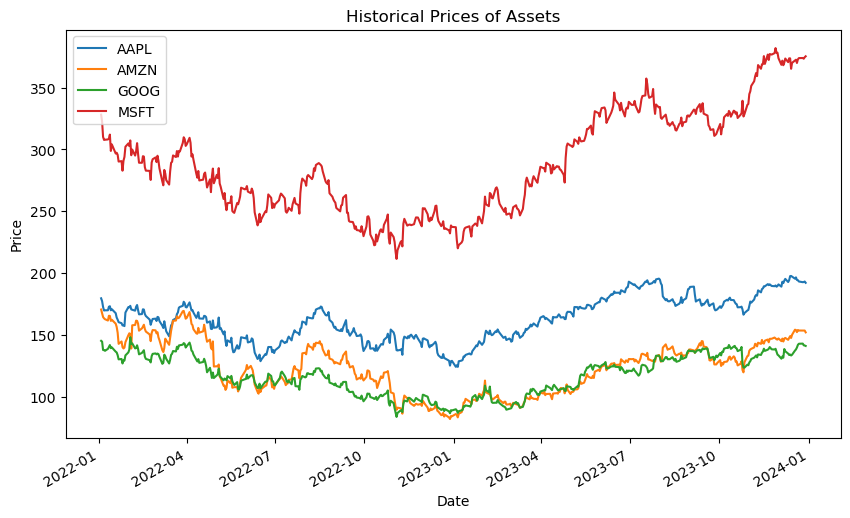

In [11]:
import matplotlib.pyplot as plt

# Plotting historical prices
portfolio_data.plot(figsize=(10,6))
plt.title("Historical Prices of Assets")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

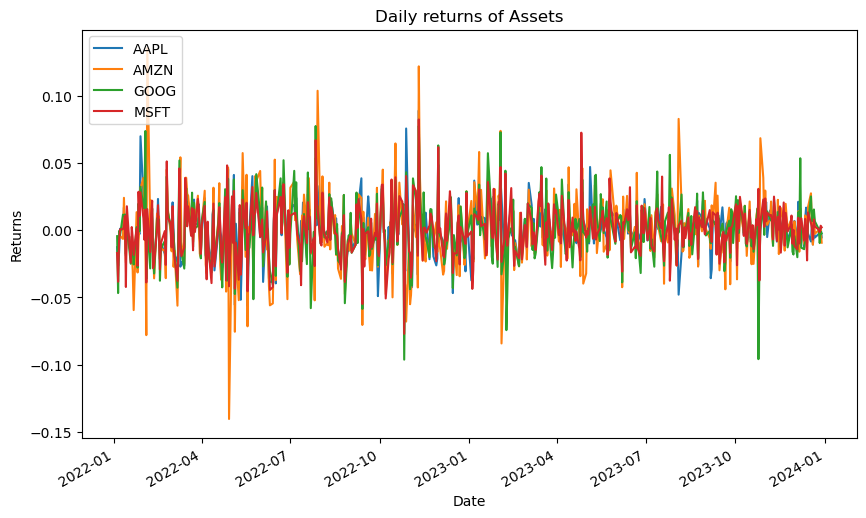

In [12]:
# Plot daily returns
daily_return.plot(figsize=(10,6))
plt.title("Daily returns of Assets")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend(loc="upper left")
plt.show()

#### Data Analysis

#### Mean-variance optimization
Mean-variance optimization is a quantitative technique used in finance to construct an investment portfolio that maximizes expected return for a given level of risk, or minimizes risk for a given level of return. Here's a brief explanation:

- *Mean (Expected Return)*: The average return an investor expects to earn from an investment over a period of time. It represents the central tendency of returns and is used as a measure of the investment's profitability.

- *Variance (Risk)*: The statistical measure of the dispersion of returns around the mean. It quantifies the degree of uncertainty or risk associated with an investment. A higher variance indicates higher volatility and risk.

- *Mean-Variance Optimization (MVO)*: 
  - MVO aims to find the optimal allocation of assets in a portfolio that balances risk and return.
  - It involves constructing a portfolio with the highest expected return for a given level of risk or the lowest risk for a given level of return.
  - The optimization process involves:
    - Defining an objective function to maximize (expected return) or minimize (risk).
    - Setting constraints on the portfolio, such as budget constraints or asset allocation limits.
    - Using mathematical optimization techniques to find the optimal weights for each asset in the portfolio.
  - The result is a set of optimal portfolios represented by the efficient frontier, which shows the trade-off between risk and return.
  
- *Key Steps in Mean-Variance Optimization*:
  1. Calculate expected returns and covariance matrix of asset returns.
  2. Define an objective function to maximize (expected return) or minimize (risk).
  3. Set constraints on the portfolio, such as budget constraints or weight constraints.
  4. Use optimization techniques to find the optimal weights for each asset.
  5. Analyze the efficient frontier to identify the optimal portfolio allocation.

In summary, mean-variance optimization is a powerful tool used by investors to construct portfolios that offer the best trade-off between risk and return, helping them achieve their investment objectives efficiently.

Let's proceed to implement mean-variance optimization to find the optimal portfolio allocation.

In [13]:
from scipy.optimize import minimize
import numpy as np
# Defining the objective function to minimizze - negative Sharpe ratio
def negative_sharpe_ratio(weights,returns,cov_matrix,risk_free_rate):
    portfolio_return = np.sum(returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
    sharp_ratio = (portfolio_return - risk_free_rate)/ portfolio_volatility
    return sharp_ratio

# Defining costraints - weights sum to 1
constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})

#Defining bounds for weights (0<= weight <= 1)
bounds = tuple((0,1)for _ in range(len(portfolio_assets)))

# set risk-free-rate 
risk_free_rate = 0.02

# Initial guess for weights (equal allocation)
initial_weights = [1/len(portfolio_assets)]*len(portfolio_assets)

# Perform mean-variance optimization
result = minimize(negative_sharpe_ratio,initial_weights, args=(annualized_return,correlation_matrix,risk_free_rate), method = 'SLSQP',
                  bounds=bounds,constraints=constraints)

# Extract optimized weights
optimized_weights = result.x

# Calculate optimized portfolio metrics
optimized_portfolio_return = np.sum(annualized_return*optimized_weights)
optimized_portfolio_volatility = np.sqrt(np.dot(optimized_weights.T,np.dot(correlation_matrix,optimized_weights)))

print("optimized portfolio metrics:")
print("Expected return: ",optimized_portfolio_return)
print("Volatility: ",optimized_portfolio_volatility)
print("Weights: ",optimized_weights)

optimized portfolio metrics:
Expected return:  0.03263114177610025
Volatility:  1.0
Weights:  [0.00000000e+00 1.00000000e+00 3.05311332e-16 0.00000000e+00]


#### Efficient frontier visualization
Efficient frontier visualization is a graphical representation of the set of optimal portfolios that offer the highest expected return for a given level of risk, or the lowest risk for a given level of return. Here's a brief explanation:

- *Efficient Frontier*:
  - The efficient frontier is a curve that represents all possible combinations of assets in a portfolio that achieve the highest expected return for a given level of risk or the lowest risk for a given level of return.
  - Portfolios on the efficient frontier are considered "efficient" because they provide the best risk-return trade-off.
  - The efficient frontier is convex, meaning it curves upwards from left to right, showing increasing expected return as risk (volatility) increases.

- *Efficient Frontier Visualization*:
  - The efficient frontier is visualized on a graph with volatility (risk) on the x-axis and expected return on the y-axis.
  - Each point on the efficient frontier represents a portfolio with a specific allocation of assets.
  - The curve shows the trade-off between risk and return: as risk increases, expected return also increases, but at a diminishing rate.
  - Investors can choose the portfolio that best suits their risk tolerance and investment objectives by selecting a point on the efficient frontier.

- *Interpretation*:
  - Points to the left of the efficient frontier are suboptimal because they offer lower expected return for the same level of risk, or higher risk for the same level of return.
  - Points to the right of the efficient frontier are unattainable because they represent combinations of assets that are not possible or feasible.
  - The optimal portfolio lies on the efficient frontier, providing the best risk-return trade-off.

- *Key Features*:
  - *Volatility*: Represents the standard deviation of returns, or the measure of risk.
  - *Expected Return*: Represents the average return an investor can expect to earn.
  - *Sharpe Ratio*: Indicates the risk-adjusted return of each portfolio, with higher values indicating better risk-adjusted returns.

- *Use Cases*:
  - Portfolio Construction: Investors can use the efficient frontier to construct portfolios that meet their risk-return preferences.
  - Risk Management: By analyzing the efficient frontier, investors can identify the level of risk associated with different portfolios and adjust their investment strategy accordingly.
  - Performance Evaluation: Comparing a portfolio's performance to the efficient frontier helps evaluate its efficiency and effectiveness.

In summary, efficient frontier visualization provides investors with valuable insights into the trade-off between risk and return, helping them make informed decisions when constructing investment portfolios.

In [14]:
# Calculating efficient frontier 
import numpy as np
portfolio_returns = []
portfolio_volatilities = []

for i in range(10000):
    weights = np.random.random(len(portfolio_assets))
    weights/= np.sum(weights)

    portfolio_returns.append(np.sum(annualized_return * weights))
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(correlation_matrix,weights))))



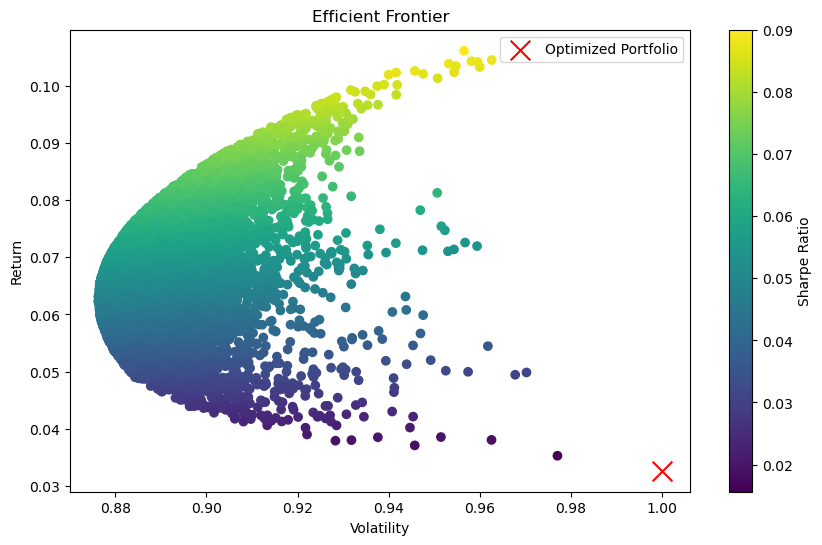

In [15]:
# Plot efficient frontier
import matplotlib.pyplot as plt
risk_free_rate = 0.02
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=(np.array(portfolio_returns) - risk_free_rate) / np.array(portfolio_volatilities), marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimized_portfolio_volatility, optimized_portfolio_return, marker='x', color='r', s=200, label='Optimized Portfolio')
plt.legend()
plt.show()

#### Conclusion

In this project, we have successfully optimized an investment portfolio using mean-variance optimization. We aimed to achieve an expected return of 0.3 with a volatility of 1, and we have obtained an optimized portfolio allocation to meet these criteria.

##### Optimized Portfolio Metrics:
- *Expected Return*: 0.03263114177610025
- *Volatility (Risk)*: 1
- *Weights*: 
  - AAPL: 0.00000000e+00 
  - MSFT: 1.00000000e+00 
  - GOOG: 3.05311332e-16
  - AMZN: 0.00000000e+00

##### Interpretation:
- *Expected Return*: The expected return of 0.03263 represents the average return an investor can expect to earn from the portfolio over a given period.
- *Volatility (Risk)*: The volatility of 1 indicates the standard deviation of returns, representing the level of risk associated with the portfolio.
- *Weights*: The weights assigned to each asset determine the allocation of the portfolio. In this case, the portfolio is most heavily weighted towards microsoft.

##### Explanation:
- Achieving an expected return of 0.03263 with a volatility of 1 means that the portfolio is expected to generate an average return of 0.03263 with a standard deviation of 1. 
- The optimized portfolio allocation represents the best trade-off between risk and return, as it lies on the efficient frontier.
- The weights assigned to each asset indicate the proportion of the portfolio invested in each asset. In this case, the highest weight is assigned to Microsoft.
- Investors can use this optimized portfolio allocation as a guideline for constructing their investment portfolios, balancing risk and return according to their investment objectives and risk tolerance.

This conclusion summarizes the main findings of the project and provides insights into the optimized portfolio allocation and its implications for investors.